### LogP dataset:

In [1]:
import torch.optim

from dglchem.datasets import LogP
data = LogP(log=True) 

SMILES c1cc(C)ccc1O[Si]12OCCN(CCO1)CCO2 in index 4816 contains the atom Si that is not permitted and will be ignored.
SMILES CC1=CC=C(O[Si]23OCCN(CCO2)CCO3)C=C1 in index 4817 contains the atom Si that is not permitted and will be ignored.
SMILES [H]C1=C([H])C(=C([H])C([H])=C1O[Si]12OC([H])([H])C([H])([H])N(C([H])([H])C([H])([H])O1)C([H])([H])C([H])([H])O2)C([H])([H])[H] in index 4818 contains the atom Si that is not permitted and will be ignored.
SMILES c3cc(C)ccc3O[Si]12OCCN(CCO2)CCO1 in index 4819 contains the atom Si that is not permitted and will be ignored.
SMILES Cc1ccc(cc1)O[Si]12OCCN(CCO1)CCO2 in index 4820 contains the atom Si that is not permitted and will be ignored.
SMILES Cc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 in index 4821 contains the atom Si that is not permitted and will be ignored.
SMILES c1ccc(Cl)cc1O[Si]12OCCN(CCO1)CCO2 in index 6328 contains the atom Si that is not permitted and will be ignored.
SMILES [H]C1=C([H])C(O[Si]23OC([H])([H])C([H])([H])N(C([H])([H])C([H])([H])O

### Example outputs:

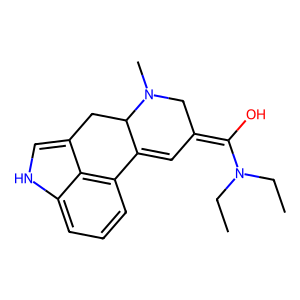

In [2]:
data.draw_smile(10)

### Analysis:

Loaded dataset.


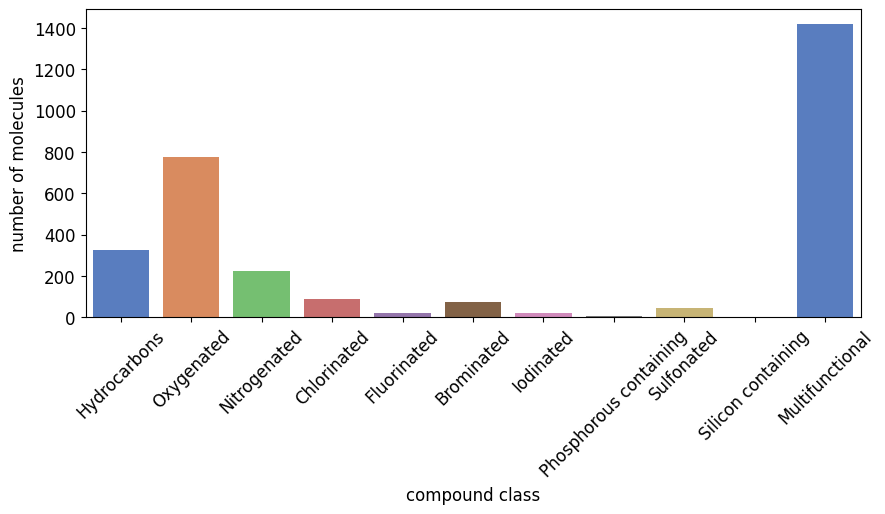

In [3]:
from dglchem.utils import DataSet
from dglchem.utils import compound_nums_chart

data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')
compound_nums_chart(data.smiles, fig_size=(10,4))

In [4]:
from dglchem.utils import DataSet
data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')
data.weight_vs_target_plot(pre_standardization=True)

Loaded dataset.


ValueError: Data was not loaded in from a raw file, this configuration is not possible.

Loaded dataset.


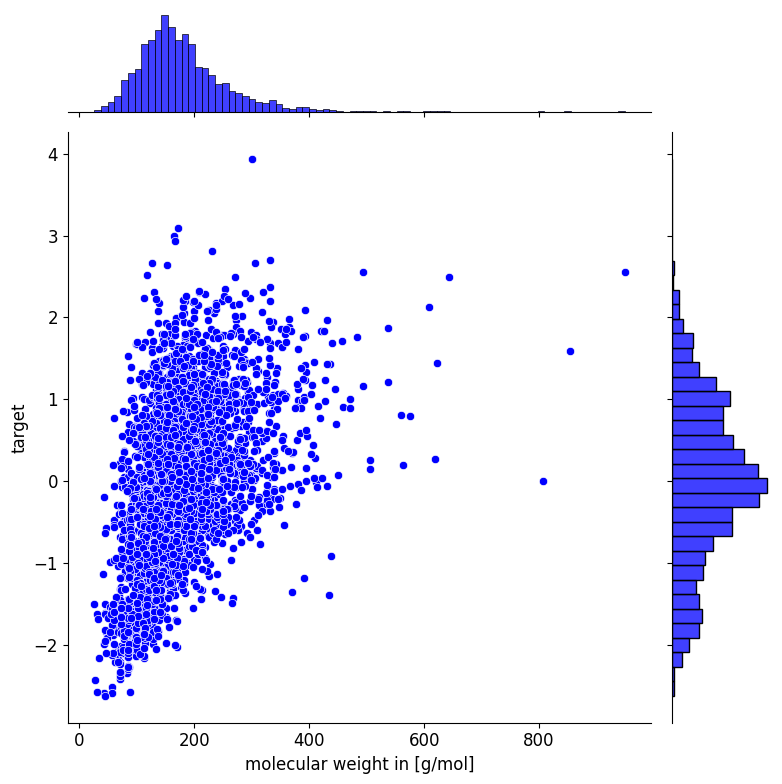

In [5]:
%matplotlib inline

from dglchem.utils import DataSet
data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')
data.weight_vs_target_plot(fig_height=3, save_fig=True)

Loaded dataset.


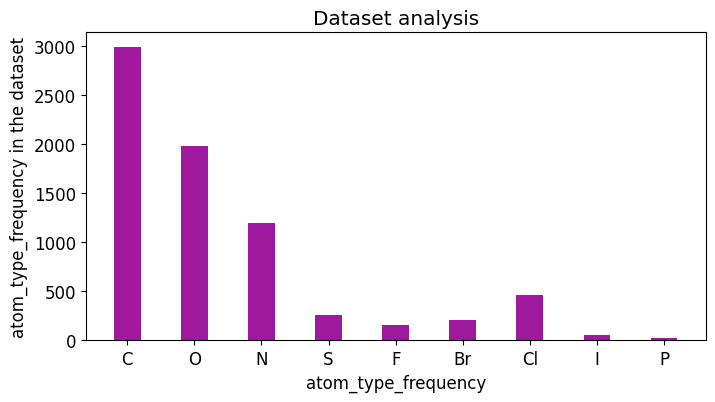

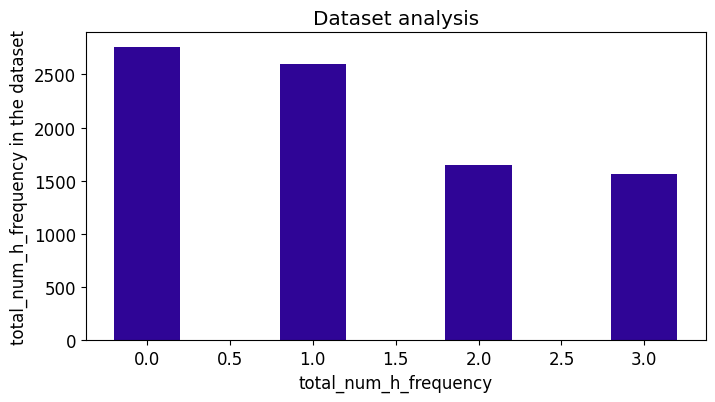

In [6]:
%matplotlib inline

from dglchem.utils import DataSet
data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')

results, figures = data.analysis(download=True, plots=['atom_type_frequency','total_num_h_frequency'], fig_size=[8,4])

### Butina clustering:

In [8]:
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils.data_splitting import taylor_butina_clustering
data = BradleyDoublePlus()

clusters = taylor_butina_clustering(data, threshold=0.8, radius=3)

[0 0 0 ... 0 0 0]
1813
57
59
60
63
73
82
109
115
116
117
121
124
129
130
135
144
145
179
201
202
203
228
234
248
262
276
278
288
318
322
326
329
335
336
387
391
401
402
411
417
419
429
431
433
435
437
440
452
456
472
474
478
481
487
503
507
508
509
516
521
523
526
527
531
534
538
544
562
572
587
588
598
600
601
602
604
610
617
623
625
630
631
633
639
646
657
661
675
679
681
688
695
702
707
710
712
713
715
722
729
744
745
762
772
777
779
790
794
800
814
821
822
837
839
846
852
862
868
869
870
894
913
914
918
923
926
935
946
958
959
960
970
972
982
988
992
993
994
995
996
997
1001
1002
1017
1025
1031
1033
1034
1036
1040
1044
1047
1048
1056
1059
1062
1066
1080
1083
1084
1085
1088
1094
1098
1100
1115
1116
1117
1119
1121
1122
1124
1125
1126
1128
1130
1132
1137
1140
1141
1144
1145
1146
1147
1155
1156
1159
1160
1163
1165
1172
1174
1177
1183
1194
1196
1199
1204
1210
1216
1222
1226
1227
1228
1239
1240
1243
1245
1251
1264
1272
1278
1279
1281
1282
1283
1285
1291
1300
1301
1311
1312
1317
1327
1332

## GNN Model:

In [2]:
from dglchem.utils import DataSet

data = DataSet(file_path='/Users/faerte/Desktop/dgl_chem/notebooks/data/processed/BradleyDoublePlus.pickle')

train, test, val = data.get_splits()
print(train[1:10])

Loaded dataset.
[Data(x=[10, 42], edge_index=[2, 20], edge_attr=[20, 12], y=[1]), Data(x=[8, 42], edge_index=[2, 14], edge_attr=[14, 12], y=[1]), Data(x=[10, 42], edge_index=[2, 20], edge_attr=[20, 12], y=[1]), Data(x=[9, 42], edge_index=[2, 18], edge_attr=[18, 12], y=[1]), Data(x=[10, 42], edge_index=[2, 20], edge_attr=[20, 12], y=[1]), Data(x=[11, 42], edge_index=[2, 22], edge_attr=[22, 12], y=[1]), Data(x=[13, 42], edge_index=[2, 26], edge_attr=[26, 12], y=[1]), Data(x=[16, 42], edge_index=[2, 34], edge_attr=[34, 12], y=[1]), Data(x=[15, 42], edge_index=[2, 30], edge_attr=[30, 12], y=[1])]


In [3]:
print(f'Node feature dimension: {data.num_node_features}')
print(f'Edge feature dimension: {data.num_edge_features}')

Node feature dimension: 42
Edge feature dimension: 12


### Model definition:

In [4]:
from dglchem.models import MGConv, SimpleGNN
import torch
from torch.nn import Sequential

node_hidden_dim = 64
batch_size = 32

model_message = MGConv(num_layers=5, edge_hidden_dim=64, node_hidden_dim=node_hidden_dim, 
                node_in_dim=data.num_node_features, edge_in_dim=data.num_edge_features)

model = SimpleGNN(model_message=model_message,
                      input_pool_size=node_hidden_dim, 
                      output_size=1, 
                      batch_size=batch_size)

print(model)

device = torch.device('cpu')

SimpleGNN(
  (model): MGConv(
    (gnn_layers): ModuleList(
      (0-4): 5 x Weave()
    )
  )
  (lin_out): Linear(in_features=64, out_features=1, bias=True)
)


### Loss and Optimizer

In [5]:
from torch import nn

loss_func = nn.functional.mse_loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

### Training

In [6]:
from dglchem.utils import train_model

train_loss, val_loss = train_model(model = model,
                                   loss_func = loss_func,
                                   optimizer = optimizer,
                                   train_data_loader= train,
                                   val_data_loader = val,
                                   batch_size=batch_size,
                                   epochs=100,
                                   early_stopping=True,
                                   patience=20)

epoch=95, training loss= 0.139, validation loss= 0.192: 100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


### Loss plot

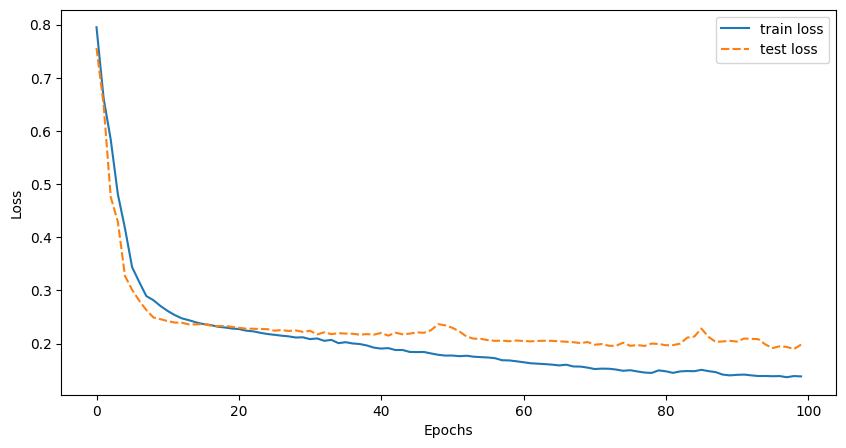

In [7]:
from dglchem.utils import loss_plot
loss_plot([train_loss, val_loss], ['train loss', 'test loss'])

### Testing

In [8]:
from dglchem.utils import test_model
test_model(model = model,
           test_data_loader= test,
           loss_func= loss_func)

100%|██████████| 10/10 [00:00<00:00, 175.98it/s]

Test loss: 0.196


0.1955249972641468